catboost가 좋은 성능을 보임
- 몇가지 변수 넣고빼고 경우의수 나누어 진행
- catboost는 범주형에 더 좋은 모델로 범주형으로 변경하여 시도해보자

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
age_info = pd.read_csv("./age_gender_info.csv")
age_info

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


In [4]:
s_df = pd.read_csv("./sample_submission.csv")
s_df

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
5,C1563,0
6,C1794,0
7,C1640,0
8,C1377,0
9,C2072,0


In [5]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [6]:
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [7]:
test_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [8]:
train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [9]:
test_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')

In [10]:
train_df.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '등록차량수']

In [11]:
test_df.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수']

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   자격유형      2952 non-null   object 
 9   임대보증금     2383 non-null   object 
 10  임대료       2383 non-null   object 
 11  지하철역수     2741 non-null   float64
 12  버스정류장수    2948 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 346.1+ KB


- 금액이 object로 되어있으므로 이상값을 찾아 변경해야함 -> 임대료, 임대보증금

In [13]:
for i in train_df[train_df['임대보증금'].isnull() == False]['임대보증금']:
    print(i)

15667000
15667000
27304000
27304000
27304000
27304000
27304000
30357000
9216000
12672000
12672000
18433000
18433000
23042000
23042000
15620000
15620000
15620000
27637000
27637000
27637000
27637000
36048000
36048000
42056000
42056000
15607000
15607000
23139000
23139000
29209000
29209000
12015000
12015000
21628000
25233000
12015000
12015000
12015000
21628000
21628000
25233000
29551000
29551000
29551000
29551000
43990000
43990000
43990000
43990000
43990000
43990000
49854000
49854000
49854000
17730000
23641000
23641000
23641000
35462000
35462000
35462000
35462000
35462000
35462000
41372000
41372000
10813000
10813000
16821000
16821000
16821000
25233000
32443000
32443000
32443000
32443000
32443000
32443000
32443000
15271000
15407000
17687000
9714000
10244000
11807000
8052000
9174000
19436000
28252000
17460000
17460000
19954000
28687000
3141000
3141000
3731000
11492000
14215000
14292000
3138000
3631000
13930000
13930000
17568000
14247000
20173000
21203000
22307000
22307000
22307000
27885000
2

8598000
8598000
8598000
14331000
14331000
14181000
14181000
14181000
19897000
19897000
25614000
25614000
15130000
15130000
20802000
20802000
20802000
25415000
36839600
17248000
10638000
10638000
10638000
16547000
16547000
16547000
10923000
10923000
10923000
10923000
19892000
24837000
11819000
26005000
26005000
29551000
20638000
30269000
48844000
48844000
48844000
58132000
13221000
18646000
18646000
18646000
18646000
123711000
123711000
123711000
123711000
144496000
144496000
10500000
27090000
27090000
37485000
37485000
194080000
14516000
14516000
14516000
20221000
20221000
20221000
20221000
20221000
20221000
22766000
22766000
26313000
78957000
90237000
90237000
90237000
87444000
174888000
174888000
194562000
194562000
216423000
8684000
8684000
10827000
23347000
31980200
5514000
18047000
18047000
18047000
24814000
24814000
24814000
28199000
28199000
28199000
44387000
44387000
44387000
44387000
50775000
50775000
20303000
20303000
36095000
36095000
36095000
43990000
43990000
21015000
2101

In [14]:
for i in train_df[train_df['임대료'].isnull() == False]['임대료']:
    print(i)

103680
103680
184330
184330
184330
184330
184330
214270
82940
107130
107130
149760
149760
190090
190090
127350
127350
127350
164610
164610
164610
164610
198250
198250
253520
253520
130070
130070
193230
193230
244020
244020
102130
102130
132160
144180
102130
102130
102130
132160
132160
144180
203030
203030
203030
203030
304540
304540
304540
304540
304540
304540
338380
338380
338380
118190
141840
141840
141840
189130
189130
189130
189130
189130
189130
236410
236410
144180
144180
205460
205460
205460
283560
192250
192250
192250
192250
192250
192250
192250
78230
88400
100260
145940
152280
171230
130850
144460
161780
235420
122210
122210
130940
149660
69900
69900
83020
104930
141630
141630
69820
80800
37360
37360
45180
198980
225100
225100
89210
89210
89210
111520
111520
111520
79980
79980
79980
79980
94990
159960
159960
159960
177500
236220
236470
236710
273790
79980
94990
28140
119190
120370
79980
94990
122290
118580
149810
187260
187260
230950
230950
79980
94990
122290
79980
79980
79980


In [15]:
# -값을 na값으로
train_df.loc[train_df['임대보증금'] == '-', '임대보증금'] = np.nan
train_df.loc[train_df['임대료'] == '-', '임대료'] = np.nan
train_df['임대보증금'] = train_df['임대보증금'].astype(float)
train_df['임대료'] = train_df['임대료'].astype(float)

test_df.loc[test_df['임대보증금'] == '-', '임대보증금'] = np.nan
test_df.loc[test_df['임대료'] == '-', '임대료'] = np.nan
test_df['임대보증금'] = test_df['임대보증금'].astype(float)
test_df['임대료'] = test_df['임대료'].astype(float)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   자격유형      2952 non-null   object 
 9   임대보증금     2371 non-null   float64
 10  임대료       2362 non-null   float64
 11  지하철역수     2741 non-null   float64
 12  버스정류장수    2948 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 346.1+ KB


In [17]:
train_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       581
임대료         590
지하철역수       211
버스정류장수        4
단지내주차면수       0
등록차량수         0
dtype: int64

In [18]:
train_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2.371000e+03,2.362000e+03,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,2.686432e+07,1.957181e+05,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,2.161391e+07,1.303745e+05,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,1.441800e+07,1.108500e+05,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,2.097100e+07,1.612700e+05,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,3.245900e+07,2.365375e+05,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


In [19]:
train_df[train_df['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [20]:
train_df[train_df['단지코드'] == 'C1925']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
86,C1925,601,아파트,강원도,영구임대,26.37,298,9.0,C,8052000.0,130850.0,0.0,4.0,117.0,75.0
87,C1925,601,아파트,강원도,영구임대,31.32,298,9.0,C,9174000.0,144460.0,0.0,4.0,117.0,75.0
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0


In [21]:
train_df[train_df['지하철역수'].isnull()]['지역'].unique()

array(['충청남도', '대전광역시', '경상남도'], dtype=object)

In [22]:
train_df.groupby(['지역']).agg('mean')

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
지역,,,,,,,,,,
강원도,549.288770,45.123209,95.000000,8.989305,1.800550e+07,183339.276316,0.000000,3.422460,366.679144,388.245989
경기도,956.763285,43.970966,116.141707,13.220612,3.272669e+07,226381.884058,0.201288,4.333333,814.222222,794.784219
경상남도,695.644986,42.194092,98.260163,11.560976,2.192353e+07,165003.051471,0.000000,3.824658,475.739837,414.238482
경상북도,630.142857,45.572101,109.058824,22.252101,1.986343e+07,147809.327731,0.000000,3.016807,628.705882,640.823529
광주광역시,776.368794,43.744184,122.028369,17.063830,2.858885e+07,163677.730496,0.000000,3.496454,673.531915,731.858156
대구광역시,862.862745,47.854608,142.137255,17.862745,2.699521e+07,263120.101010,0.460784,3.735294,801.754902,873.519608
대전광역시,1285.838346,47.281090,95.409774,11.439850,2.355958e+07,173557.808219,0.722543,4.714286,693.233083,535.394737
부산광역시,1511.070122,47.214390,87.954268,13.689024,2.378672e+07,200043.495146,0.533537,2.448171,467.713415,316.545732
서울특별시,778.875000,52.275156,83.953125,8.468750,8.729323e+07,430110.181818,0.187500,4.093750,866.609375,882.328125


In [23]:
train_df[train_df['지역'] == '대전광역시']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
15,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
16,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
17,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
18,C1407,1216,아파트,대전광역시,국민임대,41.11,148,13.0,A,27637000.0,164610.0,1.0,1.0,1285.0,1064.0
19,C1407,1216,아파트,대전광역시,국민임대,41.39,74,13.0,A,27637000.0,164610.0,1.0,1.0,1285.0,1064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,C2298,581,아파트,대전광역시,행복주택,16.85,96,21.0,J,16400000.0,79000.0,0.0,3.0,408.0,444.0
2836,C2298,581,아파트,대전광역시,행복주택,26.64,204,21.0,J,24520000.0,118000.0,0.0,3.0,408.0,444.0
2837,C2298,581,아파트,대전광역시,행복주택,26.64,30,21.0,J,24520000.0,118000.0,0.0,3.0,408.0,444.0
2838,C2298,581,아파트,대전광역시,행복주택,36.86,148,21.0,J,33640000.0,162000.0,0.0,3.0,408.0,444.0


In [24]:
train_df[(train_df['지하철역수'].isnull())&(train_df['지역'] =='대전광역시')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
144,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,A,14247000.0,198980.0,NaN,7.0,517.0,179.0
145,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,A,20173000.0,225100.0,NaN,7.0,517.0,179.0
146,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,A,21203000.0,225100.0,NaN,7.0,517.0,179.0
147,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,A,22307000.0,89210.0,NaN,5.0,736.0,671.0
148,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,A,22307000.0,89210.0,NaN,5.0,736.0,671.0
149,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,A,22307000.0,89210.0,NaN,5.0,736.0,671.0
150,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,A,27885000.0,111520.0,NaN,5.0,736.0,671.0
151,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,A,27885000.0,111520.0,NaN,5.0,736.0,671.0
152,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,A,27885000.0,111520.0,NaN,5.0,736.0,671.0
171,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,A,13155000.0,177500.0,NaN,2.0,420.0,386.0


- 충남과 경남의 경우 지하철역수가 0임을 알 수 있다.
- 대전광역시의 경우 평균값이 1이 조금 안되는 수준이나 모두 0으로 대체

In [25]:
train_df['지하철역수'] = train_df['지하철역수'].fillna(0)
test_df['지하철역수'] = test_df['지하철역수'].fillna(0)

In [26]:
train_df[train_df['버스정류장수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [27]:
train_df[train_df['단지코드'] =='C1649']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [28]:
train_df[train_df['지역'] =='경상남도']['버스정류장수'].mean()

3.824657534246575

- 버스정류장 수는 경상남도의 평균 3.8을 반올림한 4로 대체

In [29]:
train_df['버스정류장수'] = train_df['버스정류장수'].fillna(4)

In [30]:
train_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       581
임대료         590
지하철역수         0
버스정류장수        0
단지내주차면수       0
등록차량수         0
dtype: int64

In [31]:
train_df['전용면적'].describe()

count    2952.000000
mean       44.757215
std        31.874280
min        12.620000
25%        32.100000
50%        39.930000
75%        51.562500
max       583.400000
Name: 전용면적, dtype: float64

In [32]:
train_df.isnull().sum(), test_df.isnull().sum()

(단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          0
 임대보증금       581
 임대료         590
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 등록차량수         0
 dtype: int64,
 단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          2
 임대보증금       186
 임대료         186
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 dtype: int64)

In [33]:
# 중복확인
train_df.drop_duplicates().shape, train_df.shape, test_df.drop_duplicates().shape, test_df.shape

((2632, 15), (2952, 15), (949, 14), (1022, 14))

- 중복이 존재하여 중복 제거

In [34]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [35]:
train_df.isnull().sum(), test_df.isnull().sum()

(단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          0
 임대보증금       304
 임대료         313
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 등록차량수         0
 dtype: int64,
 단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          2
 임대보증금       120
 임대료         120
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 dtype: int64)

In [36]:
concat_train = train_df.copy()
concat_test = test_df.copy()
concat_df = pd.concat([concat_train.drop(['등록차량수'], axis=1), concat_test])

In [37]:
concat_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,NaN,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0


In [38]:
concat_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       424
임대료         433
지하철역수         0
버스정류장수        0
단지내주차면수       0
dtype: int64

In [39]:
concat_df_x_1 = concat_df[concat_df['임대보증금'].isnull() == False]
concat_df_y_1 = concat_df[concat_df['임대보증금'].isnull()]

concat_df_x_2 = concat_df[concat_df['임대료'].isnull() == False]
concat_df_y_2 = concat_df[concat_df['임대료'].isnull()]

In [40]:
for i in range(len(concat_df_y_1['지역'].unique())):
    globals()['make_file{}'.format(i)] = concat_df_x_1[concat_df_x_1['지역'] == concat_df_y_1['지역'].unique()[i]]
concat_df_x_1 = pd.concat([globals()['make_file{}'.format(j)] for j in range(len(concat_df_y_1['지역'].unique()))])

for i in range(len(concat_df_y_2['지역'].unique())):
    globals()['make_file{}'.format(i)] = concat_df_x_2[concat_df_x_2['지역'] == concat_df_y_2['지역'].unique()[i]]
concat_df_x_2 = pd.concat([globals()['make_file{}'.format(j)] for j in range(len(concat_df_y_2['지역'].unique()))])

- 범주형 자료 중 지역이외 다른 자료를 넣으면 컬럼 수 통합에 제한이 많아 지역컬럼만 추가

In [41]:
concat_df_x_x_1 = concat_df_x_1[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_x_y_1 = concat_df_x_1['임대보증금']

concat_df_x_x_2 = concat_df_x_2[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_x_y_2 = concat_df_x_2['임대료']

concat_df_y_x_1 = concat_df_y_1[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_y_y_1 = concat_df_y_1['임대보증금']

concat_df_y_x_2 = concat_df_y_2[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_y_y_2 = concat_df_y_2['임대료']

In [42]:
concat_df_x_x_hot_1 = pd.get_dummies(concat_df_x_x_1)
concat_df_y_x_hot_1 = pd.get_dummies(concat_df_y_x_1)

concat_df_x_x_hot_2 = pd.get_dummies(concat_df_x_x_2)
concat_df_y_x_hot_2 = pd.get_dummies(concat_df_y_x_2)

In [43]:
concat_df_x_x_hot_1.shape, concat_df_y_x_hot_1.shape, concat_df_x_x_hot_2.shape, concat_df_y_x_hot_2.shape 

((1258, 14), (424, 14), (1312, 15), (433, 15))

# 임대보증금
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(concat_df_x_x_hot_1, concat_df_x_y_1)
xgb_pred_1 = xgb.predict(concat_df_y_x_hot_1)

# 임대료
xgb.fit(concat_df_x_x_hot_2, concat_df_x_y_2)
xgb_pred_2 = xgb.predict(concat_df_y_x_hot_2)

In [44]:
# 임대보증금
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(concat_df_x_x_hot_1, concat_df_x_y_1)
rf_pred_1 = rf.predict(concat_df_y_x_hot_1)

# 임대료
rf = RandomForestRegressor()
rf.fit(concat_df_x_x_hot_2, concat_df_x_y_2)
rf_pred_2 = rf.predict(concat_df_y_x_hot_2)

In [45]:
concat_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,NaN,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0


In [46]:
concat_df[concat_df['임대보증금'].isnull()]['임대보증금'] = rf_pred_1

<ipython-input-46-f9f9a47c0cec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df[concat_df['임대보증금'].isnull()]['임대보증금'] = rf_pred_1


In [47]:
num = 0
for i in concat_df[concat_df['임대보증금'].isnull()]['임대보증금'].index:
    concat_df.loc[i,'임대보증금'] = rf_pred_1[num]
    num+=1

In [48]:
num = 0
for i in concat_df[concat_df['임대료'].isnull()]['임대료'].index:
    concat_df.loc[i,'임대료'] = rf_pred_2[num]
    num+=1

In [49]:
concat_df.isnull().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        2
임대보증금       0
임대료         0
지하철역수       0
버스정류장수      0
단지내주차면수     0
dtype: int64

In [50]:
concat_df
concat_train.shape, concat_test.shape

((2632, 15), (949, 14))

In [51]:
train_df = concat_df.iloc[:2632]

In [52]:
test_df = concat_df.iloc[2632:]

In [53]:
data = pd.read_csv("./train.csv")
data = data.drop_duplicates()
data.shape

(2632, 15)

In [54]:
train_df['등록차량수'] = data['등록차량수']

<ipython-input-54-f4cfe9823d7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['등록차량수'] = data['등록차량수']


In [55]:
train_df.isnull().sum(), test_df.isnull().sum()

(단지코드        0
 총세대수        0
 임대건물구분      0
 지역          0
 공급유형        0
 전용면적        0
 전용면적별세대수    0
 공가수         0
 자격유형        0
 임대보증금       0
 임대료         0
 지하철역수       0
 버스정류장수      0
 단지내주차면수     0
 등록차량수       0
 dtype: int64,
 단지코드        0
 총세대수        0
 임대건물구분      0
 지역          0
 공급유형        0
 전용면적        0
 전용면적별세대수    0
 공가수         0
 자격유형        2
 임대보증금       0
 임대료         0
 지하철역수       0
 버스정류장수      0
 단지내주차면수     0
 dtype: int64)

In [56]:
test_df[test_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,53082180.0,587850.9,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,16434590.0,139059.7,0.0,2.0,173.0


In [57]:
test_df[test_df['단지코드'] == 'C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,28089540.0,224255.6,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,28089540.0,224255.6,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,46006910.0,555003.1,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,53082180.0,587850.9,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,53082180.0,587850.9,0.0,2.0,840.0


In [58]:
test_df[test_df['단지코드'] == 'C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,16434590.0,139059.7,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,21164280.0,192808.3,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,50307980.0,582216.2,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,15391928.0,64851.3,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,14485098.0,74249.9,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,14485098.0,74249.9,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,14367648.0,74243.4,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,14367648.0,74243.4,0.0,2.0,173.0
268,C2253,1161,상가,강원도,임대상가,24.19,1,0.0,D,14364168.0,75457.6,0.0,2.0,173.0
269,C2253,1161,상가,강원도,임대상가,27.75,1,0.0,D,11944540.0,121922.5,0.0,2.0,173.0


In [59]:
# 추론된 결측값 대체
test_df.loc[196,'자격유형'] = 'A'
test_df.loc[258,'자격유형'] = 'C'

C:\Users\KED_Internet\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


- 결측치 처리 완료
- 범주형 자료를 확인하고 컬럼 수를 줄일 수 있으면 줄이는 방안 모색
    - 현재 컬럼의 양이 많음

In [60]:
train_df['자격유형'].value_counts(), test_df['자격유형'].value_counts()

(A    1775
 D     292
 H     154
 J     105
 C      92
 I      49
 E      37
 L      33
 K      33
 N      29
 B      18
 G       9
 F       3
 M       2
 O       1
 Name: 자격유형, dtype: int64,
 A    569
 D    114
 H     92
 J     81
 C     35
 K     16
 L     12
 E     10
 N     10
 I      7
 M      2
 G      1
 Name: 자격유형, dtype: int64)

- train과 test 사이에 공통되지 않는 부분이 존재(B,F,O)

In [61]:
train_df['공급유형'].unique(), test_df['공급유형'].unique()

(array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
        '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object),
 array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '공공임대(분납)',
        '행복주택'], dtype=object))

In [62]:
train_df['공급유형'].value_counts(), test_df['공급유형'].value_counts()

(국민임대         1730
 임대상가          285
 행복주택          203
 공공임대(10년)     203
 영구임대          149
 공공임대(50년)      31
 공공임대(분납)       12
 장기전세            9
 공공분양            7
 공공임대(5년)        3
 Name: 공급유형, dtype: int64,
 국민임대         619
 행복주택         121
 임대상가         112
 영구임대          44
 공공임대(10년)     34
 공공임대(50년)     13
 공공임대(분납)       6
 Name: 공급유형, dtype: int64)

- 공공임대, 영구임대, 전세, 분양 모두 임대상가로 대체
- 행복주택은 다른 임대와 다른 특색을 가지므로 대체x

In [63]:
train_df['공급유형'] = train_df['공급유형'].replace({'공공임대(10년)': '공공임대','영구임대':'임대상가','공공임대(50년)':'공공임대',
                                      '공공임대(분납)':'공공임대','장기전세':'임대상가','공공분양':'공공임대','공공임대(5년)':'공공임대'})

<ipython-input-63-07bd63da60b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['공급유형'] = train_df['공급유형'].replace({'공공임대(10년)': '공공임대','영구임대':'임대상가','공공임대(50년)':'공공임대',


In [64]:
test_df['공급유형'] = test_df['공급유형'].replace({'공공임대(10년)': '공공임대','영구임대':'임대상가','공공임대(50년)':'공공임대','공공임대(분납)':'공공임대'})

<ipython-input-64-d47586f9c463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['공급유형'] = test_df['공급유형'].replace({'공공임대(10년)': '공공임대','영구임대':'임대상가','공공임대(50년)':'공공임대','공공임대(분납)':'공공임대'})


In [65]:
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [66]:
test_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000.0,189840.0,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000.0,249930.0,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000.0,249930.0,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000.0,249930.0,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000.0,296780.0,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,20516640.0,113119.6,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0


<AxesSubplot:>

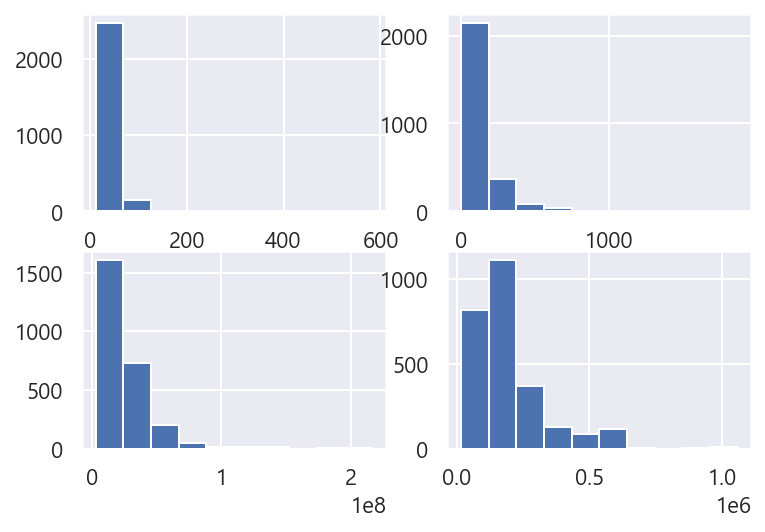

In [67]:
plt.subplot(221)
train_df['전용면적'].hist()
plt.subplot(222)
train_df['전용면적별세대수'].hist()
plt.subplot(223)
train_df['임대보증금'].hist()
plt.subplot(224)
train_df['임대료'].hist()

### 두가지로 나눔
#### First
- 전용면적/ 면적 세대수 > 범주
- 임대보증금 / 임대료 > 범주
- 양측 모두 범주 >

In [68]:
train_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
count,2632.000000,2632.000000,2632.000000,2632.000000,2.632000e+03,2.632000e+03,2632.000000,2632.000000,2632.000000,2632.000000
mean,854.095365,46.091303,114.365881,13.316869,2.661424e+07,1.979611e+05,0.148936,3.686930,636.769377,600.843085
std,484.047918,32.559242,135.742354,10.631196,2.083656e+07,1.364172e+05,0.406904,2.682349,394.668932,431.630701
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,504.000000,36.500000,26.000000,4.000000,1.486300e+07,1.105000e+05,0.000000,2.000000,334.750000,296.000000
50%,773.000000,46.405000,78.000000,13.000000,2.012200e+07,1.580570e+05,0.000000,3.000000,551.000000,520.000000
75%,1065.000000,51.850000,154.000000,20.000000,3.211000e+07,2.338600e+05,0.000000,4.000000,871.000000,795.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


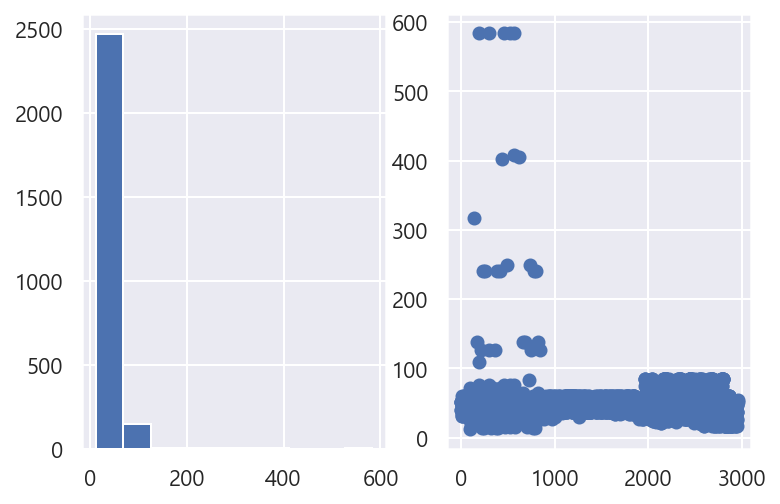

In [69]:
plt.subplot(121)
train_df['전용면적'].hist()
plt.subplot(122)
plt.scatter(train_df.index,train_df['전용면적'])

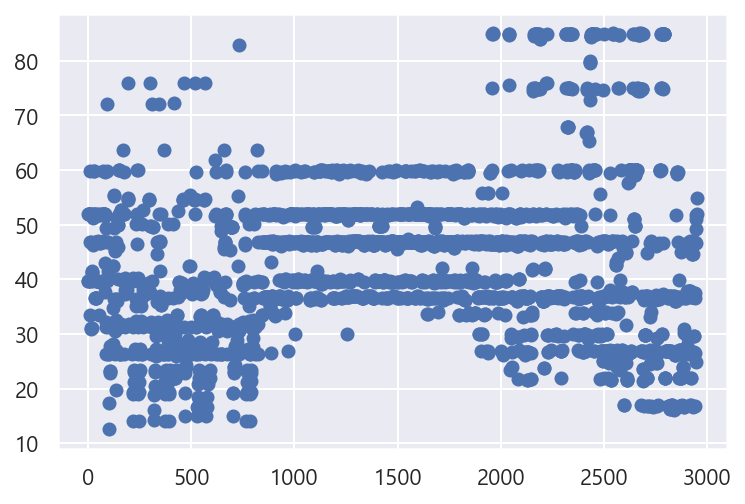

In [70]:
plt.scatter(train_df[train_df['전용면적']<=100].index,train_df[train_df['전용면적']<=100]['전용면적'])

#### 전용면적 보기
- 면적별 실거래가 볼때 면적을 60이하 / 60-85 / 85-102 / 102- 135로 나눔
- 
https://rt.molit.go.kr/srh/srh.do?menuGubun=A&srhType=AREA&houseType=1&gubunCode=LAND

In [71]:
train_df['전용면적'] = train_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=30 else 
                                                     (1 if (x>30) & (x<=40) else
                                                     (2 if (x>40) & (x<=50) else
                                                     (3 if (x>50) & (x<=60) else 4))))

<ipython-input-71-72bf764a2fc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['전용면적'] = train_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=30 else


In [72]:
train_df['전용면적'] = train_df['전용면적'].astype('object')

<ipython-input-72-22a0f2721c92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['전용면적'] = train_df['전용면적'].astype('object')


In [73]:
test_df['전용면적'] = test_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=30 else 
                                                     (1 if (x>30) & (x<=40) else
                                                     (2 if (x>40) & (x<=50) else
                                                     (3 if (x>50) & (x<=60) else 4))))

test_df['전용면적'] = test_df['전용면적'].astype('object')

<ipython-input-73-ef64bcb6daa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['전용면적'] = test_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=30 else
<ipython-input-73-ef64bcb6daa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['전용면적'] = test_df['전용면적'].astype('object')


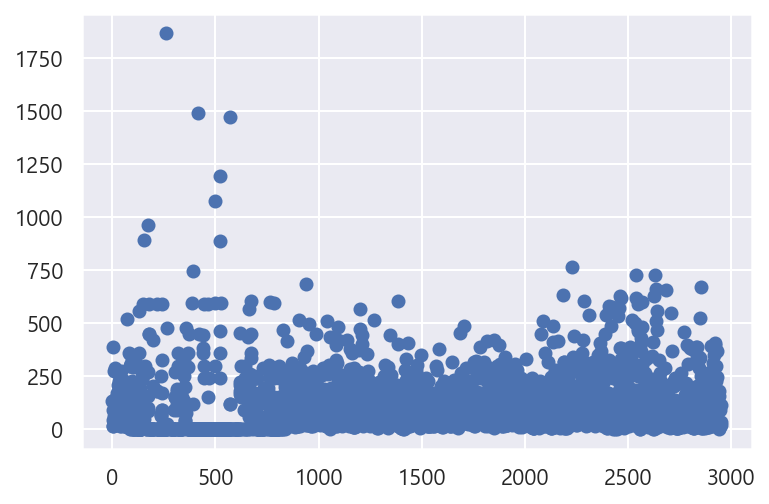

In [74]:
plt.scatter(train_df.index, train_df['전용면적별세대수'])

In [75]:
train_df['전용면적별세대수'].describe()

count    2632.000000
mean      114.365881
std       135.742354
min         1.000000
25%        26.000000
50%        78.000000
75%       154.000000
max      1865.000000
Name: 전용면적별세대수, dtype: float64

In [76]:
train_df[train_df['전용면적별세대수'] == 1]['임대건물구분'].unique()

array(['상가'], dtype=object)

- 전용면적별 세대수의 경우 범주로 나누기 어렵다고 판단됨
- 상가의 경우 전용면적과 관계없이 세대수는 1

<AxesSubplot:>

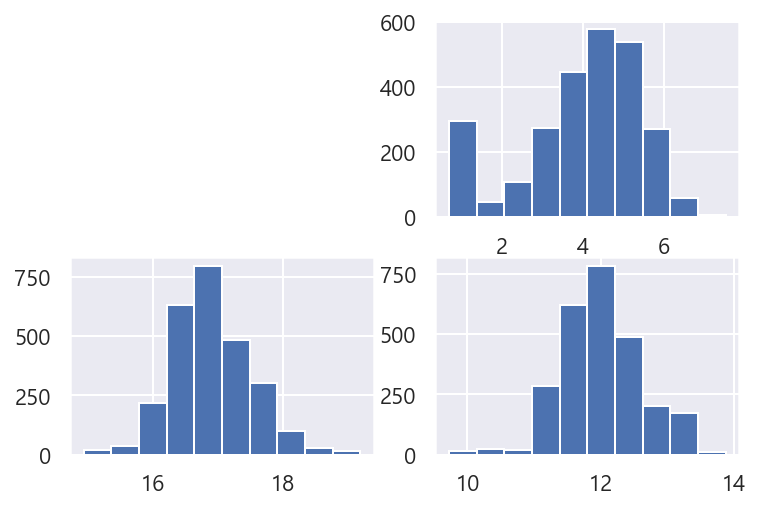

In [77]:
plt.subplot(222)
np.log1p(train_df['전용면적별세대수']).hist()
plt.subplot(223)
np.log1p(train_df['임대보증금']).hist()
plt.subplot(224)
np.log1p(train_df['임대료']).hist()

<ipython-input-78-52d6b85c36c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['전용면적별세대수'] = np.log1p(train_df['전용면적별세대수'])
<ipython-input-78-52d6b85c36c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['임대보증금'] = np.log1p(train_df['임대보증금'])
<ipython-input-78-52d6b85c36c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>,
        <AxesSubplot:title={'center':'공가수'}>],
       [<AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>,
        <AxesSubplot:title={'center':'지하철역수'}>],
       [<AxesSubplot:title={'center':'버스정류장수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>,
        <AxesSubplot:title={'center':'등록차량수'}>]], dtype=object)

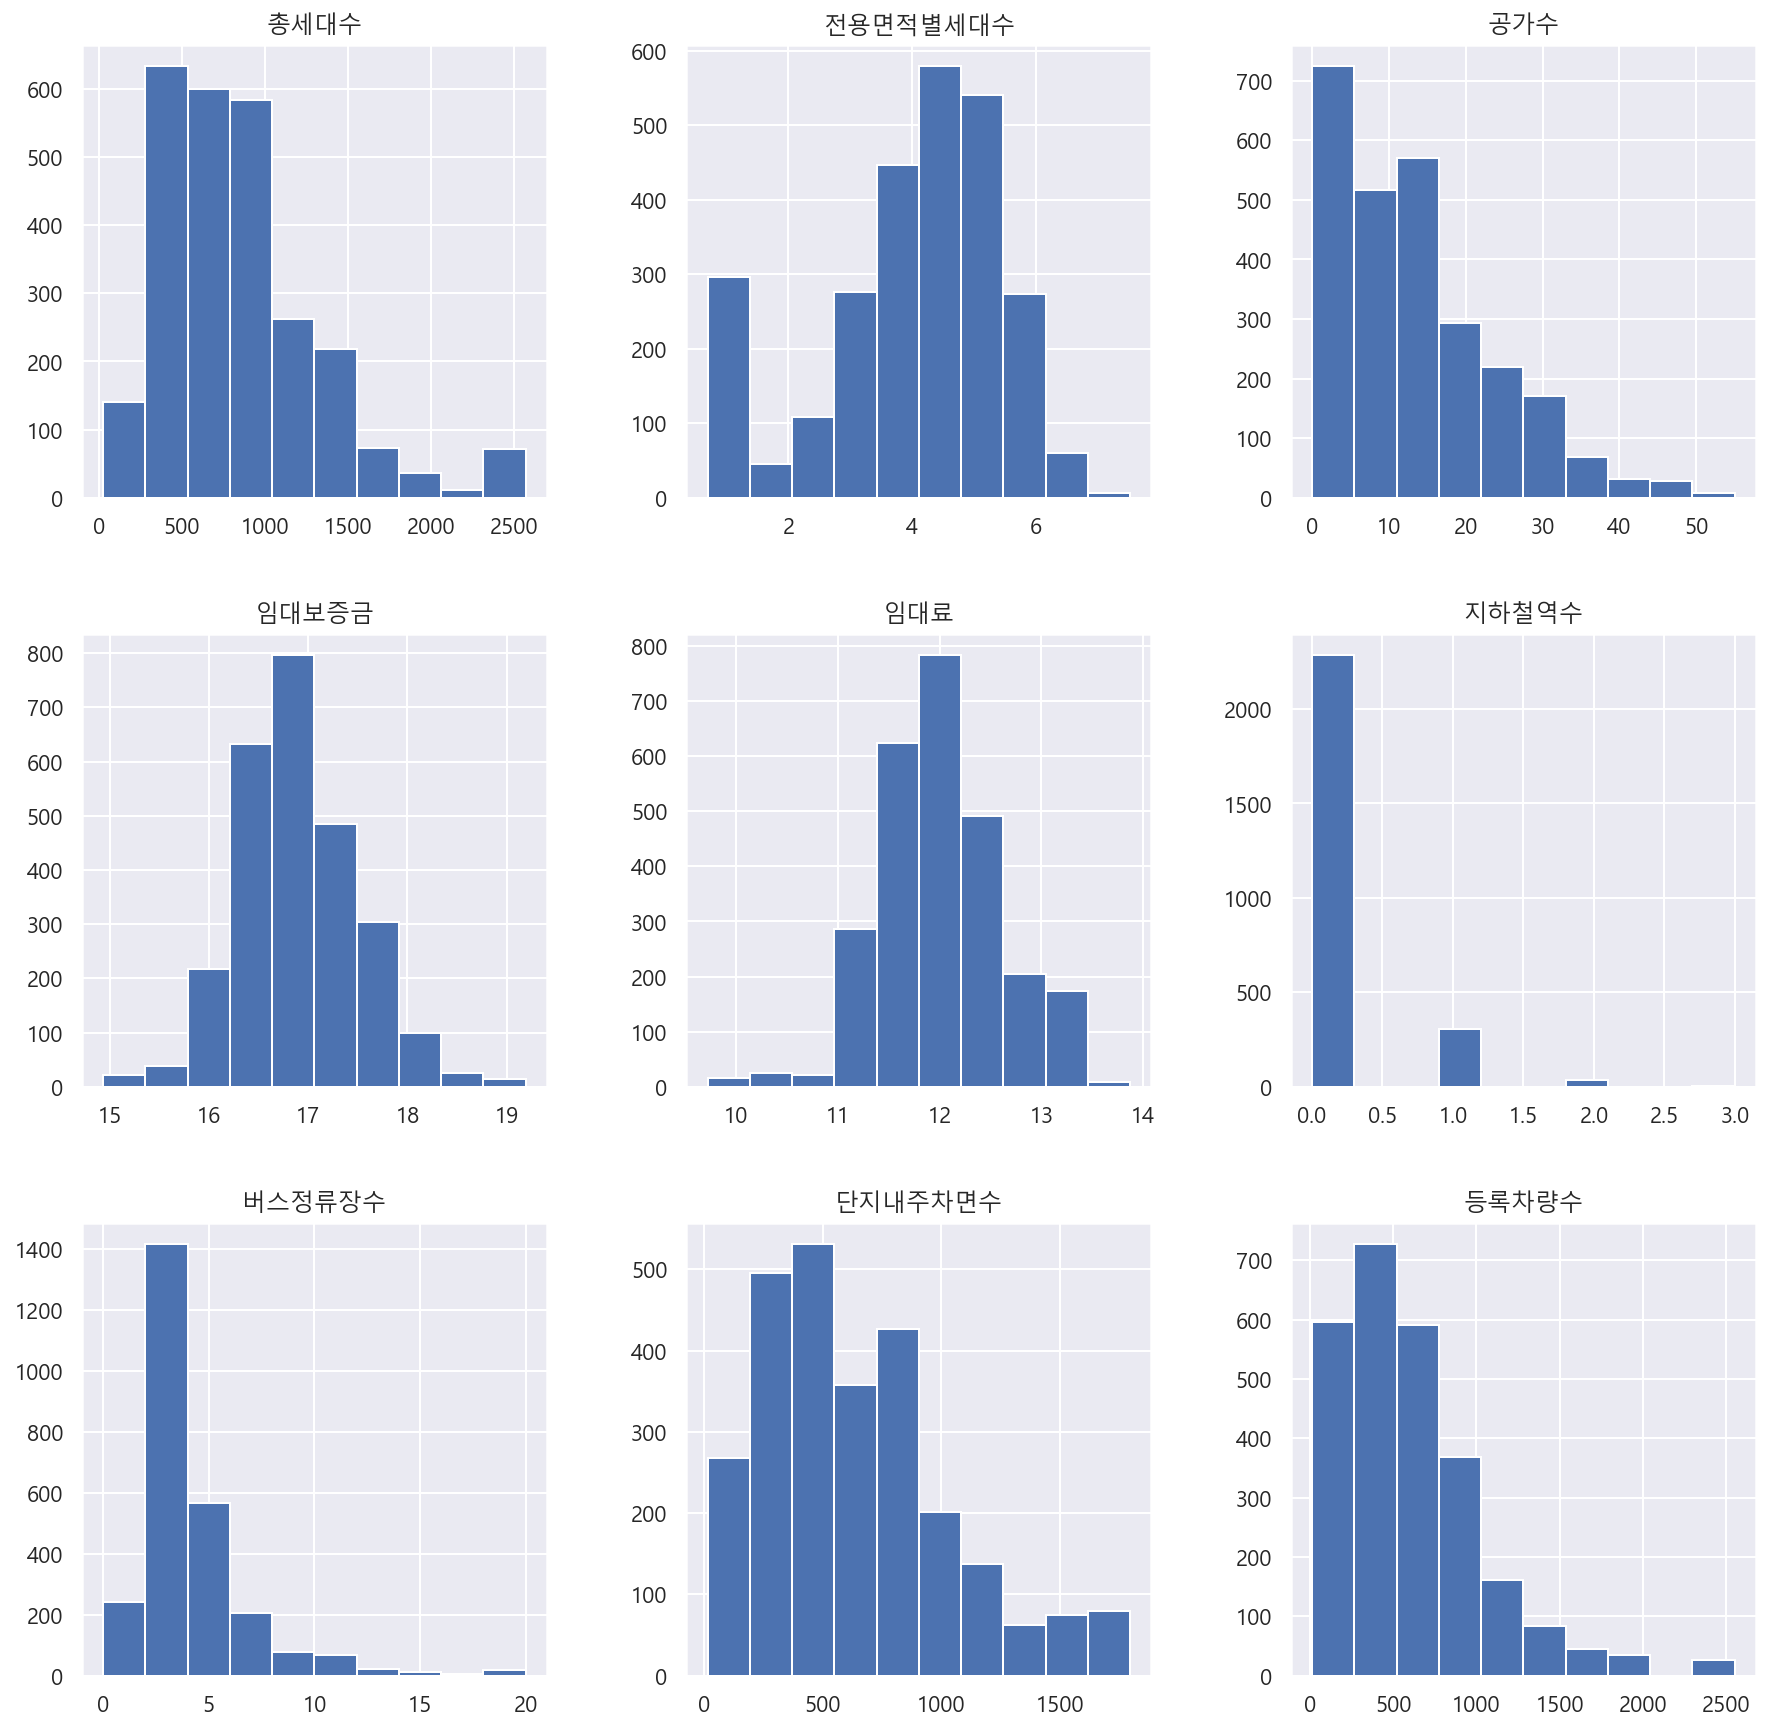

In [78]:
train_df['전용면적별세대수'] = np.log1p(train_df['전용면적별세대수'])
train_df['임대보증금'] = np.log1p(train_df['임대보증금'])
train_df['임대료'] = np.log1p(train_df['임대료'])
train_df.hist(figsize=(15,15))

<ipython-input-79-4b91f36c9b49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['전용면적별세대수'] = np.log1p(test_df['전용면적별세대수'])
<ipython-input-79-4b91f36c9b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['임대보증금'] = np.log1p(test_df['임대보증금'])
<ipython-input-79-4b91f36c9b49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>,
        <AxesSubplot:title={'center':'공가수'}>],
       [<AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>,
        <AxesSubplot:title={'center':'지하철역수'}>],
       [<AxesSubplot:title={'center':'버스정류장수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>, <AxesSubplot:>]],
      dtype=object)

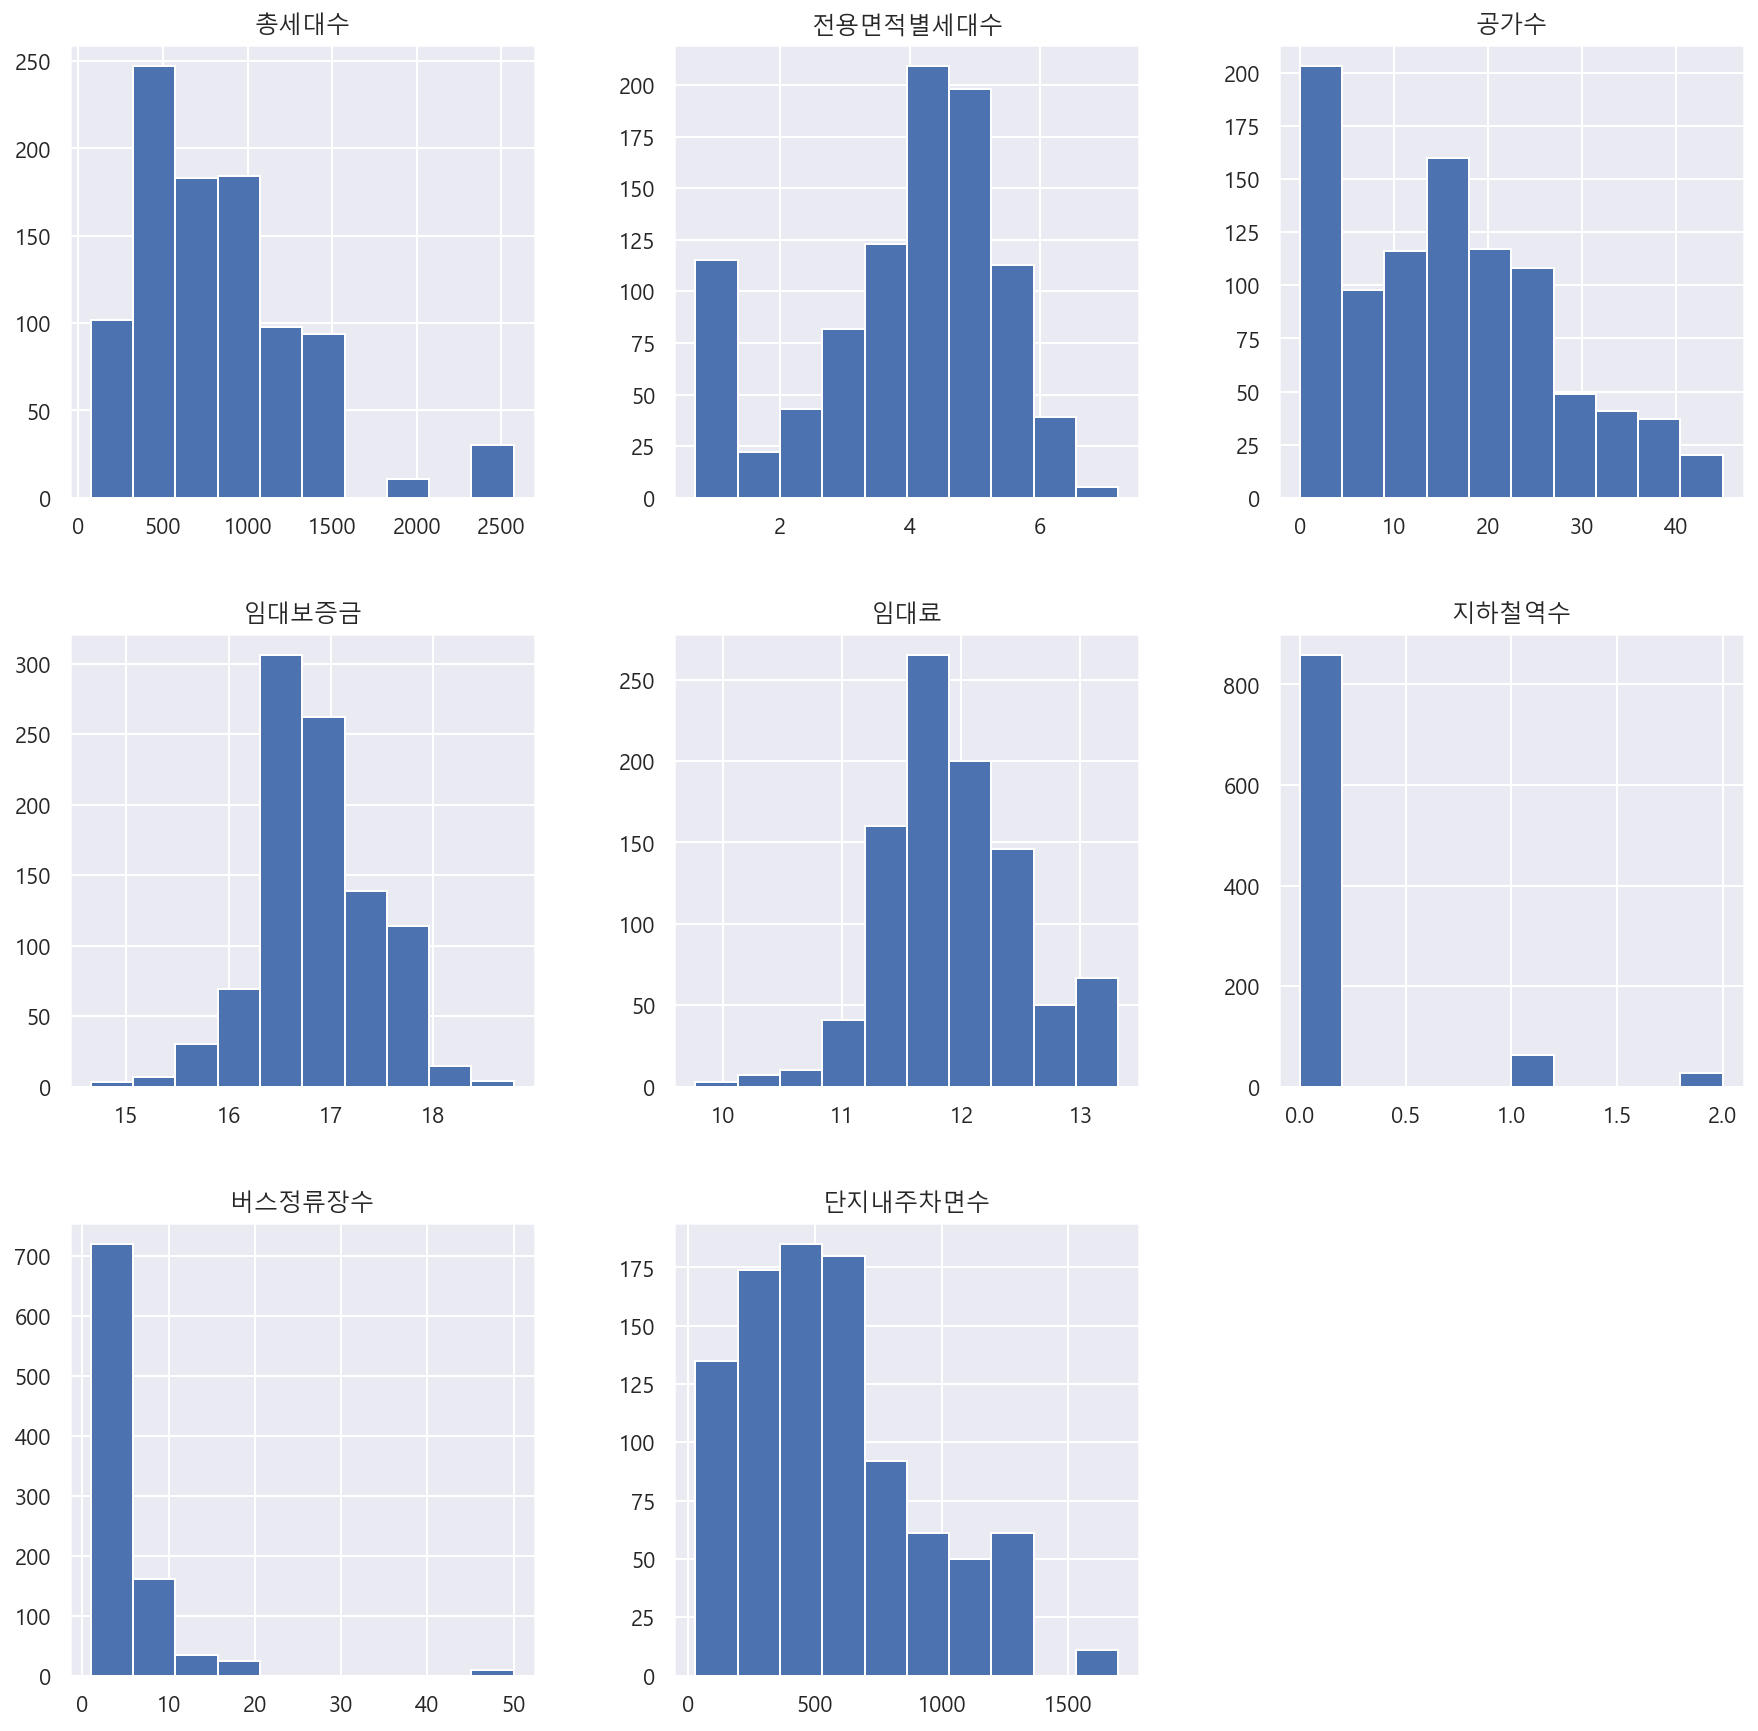

In [79]:
test_df['전용면적별세대수'] = np.log1p(test_df['전용면적별세대수'])
test_df['임대보증금'] = np.log1p(test_df['임대보증금'])
test_df['임대료'] = np.log1p(test_df['임대료'])
test_df.hist(figsize=(15,15))

In [80]:
age_info.index = age_info['지역']

In [81]:
age_info.drop(['지역'], axis=1, inplace=True)

In [82]:
train_df = pd.merge(train_df,age_info,on='지역')
test_df = pd.merge(test_df,age_info,on='지역')

train_df.shape, test_df.shape

((2632, 37), (949, 36))

In [83]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [84]:
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2483,900,아파트,경상북도,국민임대,1,4.905275,38.0,A,16.567067,11.549074,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,C2483,900,아파트,경상북도,국민임대,1,2.772589,38.0,A,16.567067,11.549074,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
2,C2483,900,아파트,경상북도,국민임대,3,5.955837,38.0,A,17.122544,12.124488,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
3,C2483,900,아파트,경상북도,국민임대,3,2.772589,38.0,A,17.122544,12.124488,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
4,C2483,900,아파트,경상북도,국민임대,3,3.737670,38.0,A,17.122544,12.124488,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,C2086,1080,아파트,세종특별자치시,공공임대,3,3.433987,7.0,A,17.479072,13.038984,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
2628,C2086,1080,아파트,세종특별자치시,공공임대,4,5.056246,7.0,A,17.707331,13.217675,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
2629,C2086,1080,아파트,세종특별자치시,공공임대,4,4.369448,7.0,A,17.707331,13.217675,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
2630,C2086,1080,아파트,세종특별자치시,공공임대,4,5.081404,7.0,A,17.926384,13.304687,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112


In [85]:
tr = train_df.copy()
te = test_df.copy()

In [86]:
tr = tr.drop(['단지코드'],axis=1)
te = te.drop(['단지코드'],axis=1)

In [87]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2631
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총세대수       2632 non-null   int64  
 1   임대건물구분     2632 non-null   object 
 2   지역         2632 non-null   object 
 3   공급유형       2632 non-null   object 
 4   전용면적       2632 non-null   object 
 5   전용면적별세대수   2632 non-null   float64
 6   공가수        2632 non-null   float64
 7   자격유형       2632 non-null   object 
 8   임대보증금      2632 non-null   float64
 9   임대료        2632 non-null   float64
 10  지하철역수      2632 non-null   float64
 11  버스정류장수     2632 non-null   float64
 12  단지내주차면수    2632 non-null   float64
 13  등록차량수      2632 non-null   float64
 14  10대미만(여자)  2632 non-null   float64
 15  10대미만(남자)  2632 non-null   float64
 16  10대(여자)    2632 non-null   float64
 17  10대(남자)    2632 non-null   float64
 18  20대(여자)    2632 non-null   float64
 19  20대(남자)    2632 non-null   float64
 20  30대(여자) 

In [88]:
x_train = tr.drop(['등록차량수'],axis=1)
y_train = tr['등록차량수']
x_test = te

In [89]:
col = ['총세대수', '전용면적별세대수', '공가수',
       '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '10대미만(여자)',
       '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)',
       '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)',
       '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)',
       '90대(남자)', '100대(여자)', '100대(남자)']


In [90]:
mm = MinMaxScaler()
x_train_scale = x_train.copy()
x_test_scale = x_test.copy()
for i in col:
    x_train_scale[col] = mm.fit_transform(x_train[col])
    x_test_scale[col] = mm.transform(x_test[col])

st = StandardScaler()
x_train_scale = st.fit_transform(x_train)
x_test_scale = st.transform(x_test)

In [91]:
from catboost import CatBoostRegressor

cat_features = ['전용면적','임대건물구분','지역','공급유형','자격유형']
model = CatBoostRegressor()

param_lst = {
    'cat_features' : [cat_features],
    'loss_function' : ['MAE'],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3,0.5],
    'n_estimators' : [100,200,300,500,1000,50],
    'max_depth' : [3,6,9,15]
}

catb_reg = RandomizedSearchCV(estimator = model, param_distributions = param_lst,
                              n_iter = 20, scoring = 'neg_mean_absolute_error',
                              cv = 5)
    
catb_search = catb_reg.fit(x_train_scale, y_train, verbose=100)
best_param = catb_search.best_params_
model = CatBoostRegressor(**best_param)
print(best_param)

0:	learn: 197.2004741	total: 497ms	remaining: 1m 38s
100:	learn: 0.3364445	total: 2m 36s	remaining: 2m 33s
199:	learn: 0.0589235	total: 5m 21s	remaining: 0us
0:	learn: 185.8123506	total: 142ms	remaining: 28.2s
100:	learn: 0.2120826	total: 2m 25s	remaining: 2m 22s
199:	learn: 0.0941699	total: 4m 51s	remaining: 0us
0:	learn: 195.0541300	total: 80.8ms	remaining: 16.1s
100:	learn: 0.4182660	total: 2m 25s	remaining: 2m 22s
199:	learn: 0.0931940	total: 4m 48s	remaining: 0us
0:	learn: 235.9736457	total: 20.3ms	remaining: 4.04s
100:	learn: 0.5153448	total: 2m 15s	remaining: 2m 12s
199:	learn: 0.1160457	total: 4m 40s	remaining: 0us
0:	learn: 210.7789639	total: 37.5ms	remaining: 7.46s
100:	learn: 0.4540779	total: 2m 4s	remaining: 2m 1s
199:	learn: 0.1208844	total: 4m 13s	remaining: 0us
0:	learn: 275.2152002	total: 47ms	remaining: 4.66s
99:	learn: 17.5864014	total: 4.78s	remaining: 0us
0:	learn: 268.8765781	total: 59.5ms	remaining: 5.89s
99:	learn: 16.5784588	total: 5.07s	remaining: 0us
0:	learn:

0:	learn: 306.9711766	total: 59.2ms	remaining: 17.7s
100:	learn: 139.1215585	total: 1m 28s	remaining: 2m 55s
200:	learn: 72.3886758	total: 3m 6s	remaining: 1m 32s
299:	learn: 42.3729328	total: 5m 12s	remaining: 0us
0:	learn: 320.4107540	total: 22ms	remaining: 6.58s
100:	learn: 154.2511726	total: 1m 26s	remaining: 2m 50s
200:	learn: 82.7719760	total: 3m 20s	remaining: 1m 38s
299:	learn: 49.3975357	total: 5m 19s	remaining: 0us
0:	learn: 314.8289782	total: 59.6ms	remaining: 17.8s
100:	learn: 154.1493814	total: 1m 3s	remaining: 2m 5s
200:	learn: 86.0734378	total: 2m 36s	remaining: 1m 16s
299:	learn: 51.9712142	total: 4m 22s	remaining: 0us
0:	learn: 277.0692620	total: 69.1ms	remaining: 34.5s
100:	learn: 17.3519512	total: 5.7s	remaining: 22.5s
200:	learn: 10.1586218	total: 11.2s	remaining: 16.6s
300:	learn: 7.0072664	total: 16.8s	remaining: 11.1s
400:	learn: 5.6893991	total: 22.3s	remaining: 5.5s
499:	learn: 4.7923820	total: 27.6s	remaining: 0us
0:	learn: 256.5447964	total: 47.3ms	remaining:

100:	learn: 119.5282638	total: 1.38s	remaining: 12.2s
200:	learn: 98.8891425	total: 2.6s	remaining: 10.3s
300:	learn: 88.4421296	total: 3.79s	remaining: 8.81s
400:	learn: 79.8305241	total: 5.04s	remaining: 7.53s
500:	learn: 74.2428731	total: 6.25s	remaining: 6.23s
600:	learn: 69.9701926	total: 7.48s	remaining: 4.96s
700:	learn: 67.0578083	total: 8.71s	remaining: 3.71s
800:	learn: 64.9387745	total: 9.9s	remaining: 2.46s
900:	learn: 63.2248944	total: 11.1s	remaining: 1.22s
999:	learn: 61.9731579	total: 12.3s	remaining: 0us
0:	learn: 303.5348205	total: 9.21ms	remaining: 9.2s
100:	learn: 92.2615113	total: 1.22s	remaining: 10.9s
200:	learn: 74.4174796	total: 2.44s	remaining: 9.72s
300:	learn: 65.7964569	total: 3.69s	remaining: 8.56s
400:	learn: 60.4488147	total: 5.04s	remaining: 7.53s
500:	learn: 56.0747554	total: 6.24s	remaining: 6.22s
600:	learn: 52.8087934	total: 7.45s	remaining: 4.94s
700:	learn: 50.2673310	total: 8.67s	remaining: 3.7s
800:	learn: 47.6863001	total: 9.87s	remaining: 2.45

In [92]:
model.fit(x_train_scale, y_train)

0:	learn: 299.2263665	total: 10.9ms	remaining: 5.45s
1:	learn: 283.7573541	total: 22.5ms	remaining: 5.61s
2:	learn: 268.9466939	total: 35.4ms	remaining: 5.86s
3:	learn: 252.4591934	total: 48.2ms	remaining: 5.97s
4:	learn: 238.6968018	total: 61.2ms	remaining: 6.05s
5:	learn: 229.4142371	total: 69.4ms	remaining: 5.72s
6:	learn: 221.4024976	total: 81.3ms	remaining: 5.72s
7:	learn: 210.4630880	total: 91.9ms	remaining: 5.65s
8:	learn: 202.4359426	total: 104ms	remaining: 5.67s
9:	learn: 197.8796317	total: 115ms	remaining: 5.61s
10:	learn: 190.9479733	total: 126ms	remaining: 5.6s
11:	learn: 184.7106883	total: 137ms	remaining: 5.58s
12:	learn: 179.8916368	total: 155ms	remaining: 5.79s
13:	learn: 173.9932813	total: 169ms	remaining: 5.88s
14:	learn: 170.6261695	total: 182ms	remaining: 5.88s
15:	learn: 165.2130002	total: 193ms	remaining: 5.83s
16:	learn: 160.9750719	total: 205ms	remaining: 5.81s
17:	learn: 158.0266515	total: 217ms	remaining: 5.81s
18:	learn: 155.7749988	total: 229ms	remaining: 5.

158:	learn: 86.6150901	total: 2.05s	remaining: 4.4s
159:	learn: 86.4681725	total: 2.06s	remaining: 4.39s
160:	learn: 86.3949015	total: 2.08s	remaining: 4.37s
161:	learn: 86.3561889	total: 2.08s	remaining: 4.35s
162:	learn: 86.1353329	total: 2.1s	remaining: 4.33s
163:	learn: 86.0737500	total: 2.11s	remaining: 4.32s
164:	learn: 86.0368260	total: 2.12s	remaining: 4.3s
165:	learn: 85.9831789	total: 2.13s	remaining: 4.28s
166:	learn: 85.7604176	total: 2.14s	remaining: 4.27s
167:	learn: 85.7397368	total: 2.15s	remaining: 4.25s
168:	learn: 85.7065322	total: 2.16s	remaining: 4.24s
169:	learn: 85.6722473	total: 2.17s	remaining: 4.22s
170:	learn: 85.5574178	total: 2.18s	remaining: 4.2s
171:	learn: 85.4485645	total: 2.19s	remaining: 4.19s
172:	learn: 85.4291781	total: 2.21s	remaining: 4.17s
173:	learn: 85.2920073	total: 2.22s	remaining: 4.16s
174:	learn: 85.1484156	total: 2.23s	remaining: 4.15s
175:	learn: 85.0129007	total: 2.25s	remaining: 4.15s
176:	learn: 84.9619651	total: 2.26s	remaining: 4.1

315:	learn: 74.0684697	total: 3.85s	remaining: 2.24s
316:	learn: 74.0191699	total: 3.87s	remaining: 2.23s
317:	learn: 73.9731707	total: 3.88s	remaining: 2.22s
318:	learn: 73.9695664	total: 3.89s	remaining: 2.21s
319:	learn: 73.9235934	total: 3.9s	remaining: 2.19s
320:	learn: 73.8782259	total: 3.91s	remaining: 2.18s
321:	learn: 73.8634850	total: 3.92s	remaining: 2.17s
322:	learn: 73.8371612	total: 3.93s	remaining: 2.16s
323:	learn: 73.6492634	total: 3.95s	remaining: 2.14s
324:	learn: 73.3923041	total: 3.96s	remaining: 2.13s
325:	learn: 73.3769459	total: 3.97s	remaining: 2.12s
326:	learn: 73.3498988	total: 3.98s	remaining: 2.1s
327:	learn: 73.3342063	total: 3.99s	remaining: 2.09s
328:	learn: 73.3309588	total: 4s	remaining: 2.08s
329:	learn: 73.2941608	total: 4.01s	remaining: 2.07s
330:	learn: 73.2894354	total: 4.02s	remaining: 2.05s
331:	learn: 73.2837295	total: 4.03s	remaining: 2.04s
332:	learn: 73.2622888	total: 4.04s	remaining: 2.03s
333:	learn: 73.2280686	total: 4.05s	remaining: 2.01

473:	learn: 67.3933743	total: 5.7s	remaining: 313ms
474:	learn: 67.3196323	total: 5.71s	remaining: 301ms
475:	learn: 67.3112967	total: 5.72s	remaining: 289ms
476:	learn: 67.2650900	total: 5.74s	remaining: 277ms
477:	learn: 67.1659736	total: 5.75s	remaining: 265ms
478:	learn: 67.1494222	total: 5.76s	remaining: 253ms
479:	learn: 67.1304114	total: 5.77s	remaining: 240ms
480:	learn: 67.1223187	total: 5.79s	remaining: 229ms
481:	learn: 67.1067105	total: 5.8s	remaining: 217ms
482:	learn: 67.0043353	total: 5.81s	remaining: 205ms
483:	learn: 66.9656688	total: 5.82s	remaining: 193ms
484:	learn: 66.9576515	total: 5.83s	remaining: 180ms
485:	learn: 66.9355426	total: 5.85s	remaining: 168ms
486:	learn: 66.9240168	total: 5.86s	remaining: 156ms
487:	learn: 66.9146387	total: 5.87s	remaining: 144ms
488:	learn: 66.9066167	total: 5.88s	remaining: 132ms
489:	learn: 66.8958202	total: 5.89s	remaining: 120ms
490:	learn: 66.8845022	total: 5.91s	remaining: 108ms
491:	learn: 66.8717845	total: 5.92s	remaining: 9

In [93]:
catb_pred = model.predict(x_test_scale)

In [94]:
test_df['등록주차수'] = catb_pred

In [95]:
test_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),등록주차수
0,C1072,754,아파트,경기도,국민임대,1,4.762174,14.0,H,16.943586,12.153942,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,691.375183
1,C1072,754,아파트,경기도,국민임대,2,3.433987,14.0,A,17.400362,12.428940,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,711.500035
2,C1072,754,아파트,경기도,국민임대,2,4.727388,14.0,H,17.400362,12.428940,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,701.450975
3,C1072,754,아파트,경기도,국민임대,2,4.795791,14.0,H,17.400362,12.428940,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,701.450975
4,C1072,754,아파트,경기도,국민임대,3,4.110874,14.0,H,17.588203,12.600750,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,703.056863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,C1229,453,아파트,세종특별자치시,행복주택,1,4.234107,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,350.577393
945,C1229,453,아파트,세종특별자치시,행복주택,1,2.197225,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,343.051192
946,C1229,453,아파트,세종특별자치시,행복주택,1,1.386294,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,343.051192
947,C1229,453,아파트,세종특별자치시,행복주택,1,1.609438,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,343.051192


In [96]:
test_df.groupby(['단지코드']).agg('mean')

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),등록주차수
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C1003,480,3.657515,29.0,16.897686,11.621497,0.0,3.0,339.0,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,219.909663
C1006,1505,1.933207,27.0,16.789394,12.009354,2.0,5.0,428.0,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,177.475561
C1016,643,4.975595,4.0,16.784298,11.807191,1.0,4.0,646.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,655.001084
C1019,321,4.301812,7.0,16.616501,11.815536,0.0,3.0,259.0,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082,307.087562
C1030,75,2.495889,12.0,17.717307,12.236645,1.0,2.0,29.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,34.099393
C1038,554,4.055230,34.0,17.896112,10.335910,0.0,1.0,387.0,0.034678,0.035339,0.059808,0.061570,0.060824,0.064937,0.061069,0.056625,0.082318,0.072648,0.082747,0.074276,0.075390,0.062427,0.041814,0.027566,0.027762,0.011212,0.005386,0.001310,0.000257,0.000037,313.042542
C1040,638,5.765009,24.0,16.496621,11.811960,0.0,3.0,548.0,0.023991,0.025997,0.053874,0.056967,0.064240,0.074689,0.052830,0.052412,0.078450,0.062317,0.084845,0.067709,0.096422,0.069088,0.052913,0.039413,0.026540,0.011912,0.004221,0.001087,0.000084,0.000000,496.737960
C1060,659,4.242013,7.0,17.446395,12.458470,0.0,5.0,602.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,656.273489
C1064,977,5.122311,20.0,16.424175,11.650416,0.0,7.0,741.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,681.533416


In [97]:
submit_df = pd.DataFrame(columns = ['code','num'])
submit_df['code'] = test_df.groupby(['단지코드']).agg('mean').index

In [98]:
number = []
for i in test_df.groupby(['단지코드']).agg('mean')['등록주차수']:
    number.append(i)

In [99]:
submit_df['num'] = number

In [100]:
submit_df

,code,num
0,C1003,219.909663
1,C1006,177.475561
2,C1016,655.001084
3,C1019,307.087562
4,C1030,34.099393
5,C1038,313.042542
6,C1040,496.737960
7,C1060,656.273489
8,C1064,681.533416
9,C1071,483.874563


In [101]:
submit_df.to_csv("./주차수요예측_v13_박주혁.csv", index=False)